# Wochentage

In [6]:
# Datensatz erweiteren um Wochentagangaben
import pandas as pd

# Beispiel: Datensatz laden
df = pd.read_csv('df_merged_umsatz_kiwo_wetter.csv')

# Konvertierung der Datumsspalte
df['Datum'] = pd.to_datetime(df['Datum'])

# Wochentag als Zahl ermitteln
df['Wochentag_Num'] = df['Datum'].dt.weekday

# Mapping von Wochentagszahlen auf Namen
wochentag_namen = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

# One-Hot-Encoding für die Wochentage mit benannten Spalten
wochentag_dummies = pd.get_dummies(df['Wochentag_Num'], prefix='Wochentag')
wochentag_dummies.columns = [f"Wochentag_{wochentag_namen[int(col.split('_')[1])]}" for col in wochentag_dummies.columns]

# Boolean (True/False) in Integer (0/1) umwandeln
wochentag_dummies = wochentag_dummies.astype(int)

# Dummies zum ursprünglichen DataFrame hinzufügen und die Spalte "Wochentag_Num" entfernen
df = pd.concat([df, wochentag_dummies], axis=1)
df = df.drop(columns=['Wochentag_Num'])

# Ergebnis prüfen
print(df.head())

# Erweiterten Datensatz speichern
df.to_csv('df_merged_umsatz_kiwo_wetter_wochentage.csv', index=False)





FileNotFoundError: [Errno 2] No such file or directory: 'df_merged_umsatz_kiwo_wetter.csv'

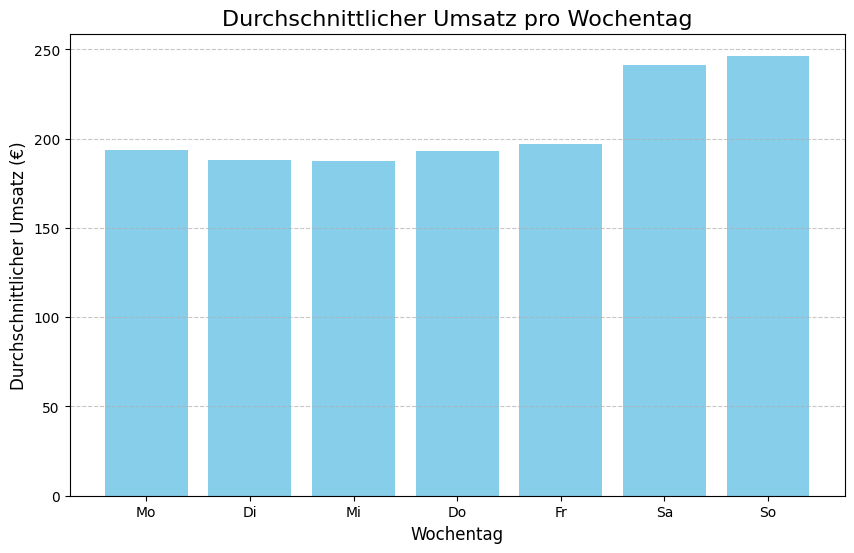

In [ ]:
# Umsatz je Wochentag
import pandas as pd
import matplotlib.pyplot as plt

# Datensatz laden
df = pd.read_csv('df_merged_umsatz_kiwo_wetter_wochentage.csv')

# Mapping der Spaltennamen zurück zu Wochentagsnamen
wochentag_namen = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

# Wochentag-Spalten in Reihenfolge sortieren
wochentag_spalten = [f"Wochentag_{tag}" for tag in wochentag_namen]

# Umsatz pro Wochentag berechnen
umsatz_pro_wochentag = {wochentag: df.loc[df[spalte] == 1, 'Umsatz'].mean() for wochentag, spalte in zip(wochentag_namen, wochentag_spalten)}

# Daten in DataFrame umwandeln (falls notwendig für Visualisierung)
umsatz_df = pd.DataFrame(list(umsatz_pro_wochentag.items()), columns=['Wochentag', 'Durchschnittlicher Umsatz'])

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.bar(umsatz_df['Wochentag'], umsatz_df['Durchschnittlicher Umsatz'], color='skyblue')
plt.title('Durchschnittlicher Umsatz pro Wochentag', fontsize=16)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



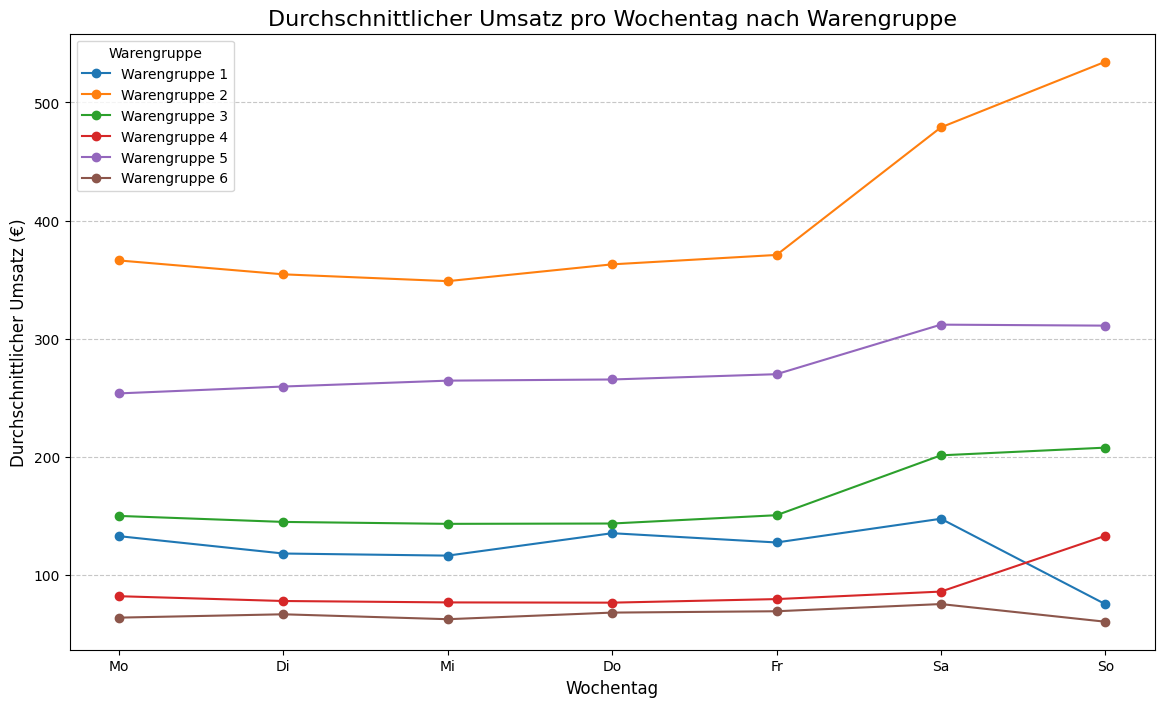

In [ ]:
# Umsatz pro Warengruppe und Wochentag
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei laden
df = pd.read_csv('df_merged_umsatz_kiwo_wetter_wochentage.csv')

# Mapping der Wochentagsnamen
wochentag_namen = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
wochentag_spalten = [f"Wochentag_{tag}" for tag in wochentag_namen]

# Umsatz nach Warengruppe und Wochentag aggregieren
umsatz_agg = []
for warengruppe in df['Warengruppe'].unique():
    for wochentag, spalte in zip(wochentag_namen, wochentag_spalten):
        avg_umsatz = df.loc[(df['Warengruppe'] == warengruppe) & (df[spalte] == 1), 'Umsatz'].mean()
        umsatz_agg.append({'Warengruppe': warengruppe, 'Wochentag': wochentag, 'Durchschnittlicher Umsatz': avg_umsatz})

umsatz_df = pd.DataFrame(umsatz_agg)

# Visualisierung: Umsatz nach Warengruppe und Wochentag
plt.figure(figsize=(14, 8))
for warengruppe in umsatz_df['Warengruppe'].unique():
    df_warengruppe = umsatz_df[umsatz_df['Warengruppe'] == warengruppe]
    plt.plot(df_warengruppe['Wochentag'], df_warengruppe['Durchschnittlicher Umsatz'], marker='o', label=f'Warengruppe {warengruppe}')

plt.title('Durchschnittlicher Umsatz pro Wochentag nach Warengruppe', fontsize=16)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Warengruppe', fontsize=10)
plt.show()


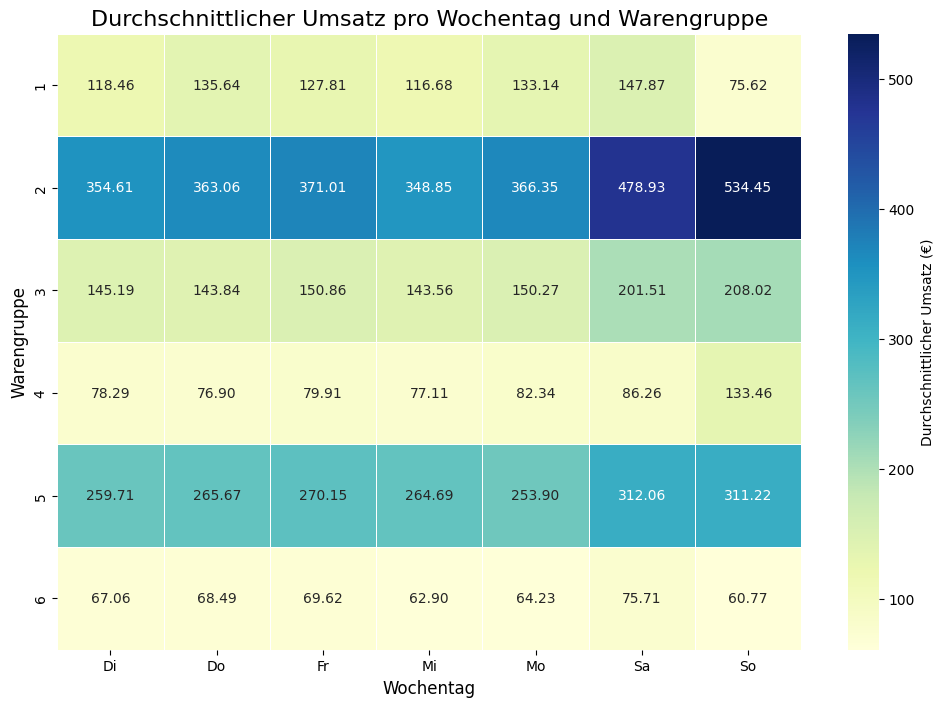

In [ ]:
# Umsatz pro Warengruppe und Wochentag (Heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap-Daten vorbereiten: Pivot-Tabelle erstellen
heatmap_data = umsatz_df.pivot_table(
    index="Warengruppe",    # Zeilen: Warengruppe
    columns="Wochentag",    # Spalten: Wochentage
    values="Durchschnittlicher Umsatz",  # Werte: Umsatz
    aggfunc="mean"          # Aggregationsfunktion: Mittelwert
)

# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Durchschnittlicher Umsatz (€)'}
)
plt.title('Durchschnittlicher Umsatz pro Wochentag und Warengruppe', fontsize=16)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Warengruppe', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()



       Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0 2013-07-01            1  148.828353          NaN         6.0     17.8375   
1 2013-07-02            1  159.793757          NaN         3.0     17.3125   
2 2013-07-03            1  111.885594          NaN         7.0     21.0750   
3 2013-07-04            1  168.864941          NaN         7.0     18.8500   
4 2013-07-05            1  171.280754          NaN         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  Wochentag_Mo  Wochentag_Di  Wochentag_Mi  \
0                 15.0        20.0             1             0             0   
1                 10.0         NaN             0             1             0   
2                  6.0        61.0             0             0             1   
3                  7.0        20.0             0             0             0   
4                 12.0         NaN             0             0             0   

   Wochentag_Do  Wochentag_Fr  Wochentag_Sa  Woche

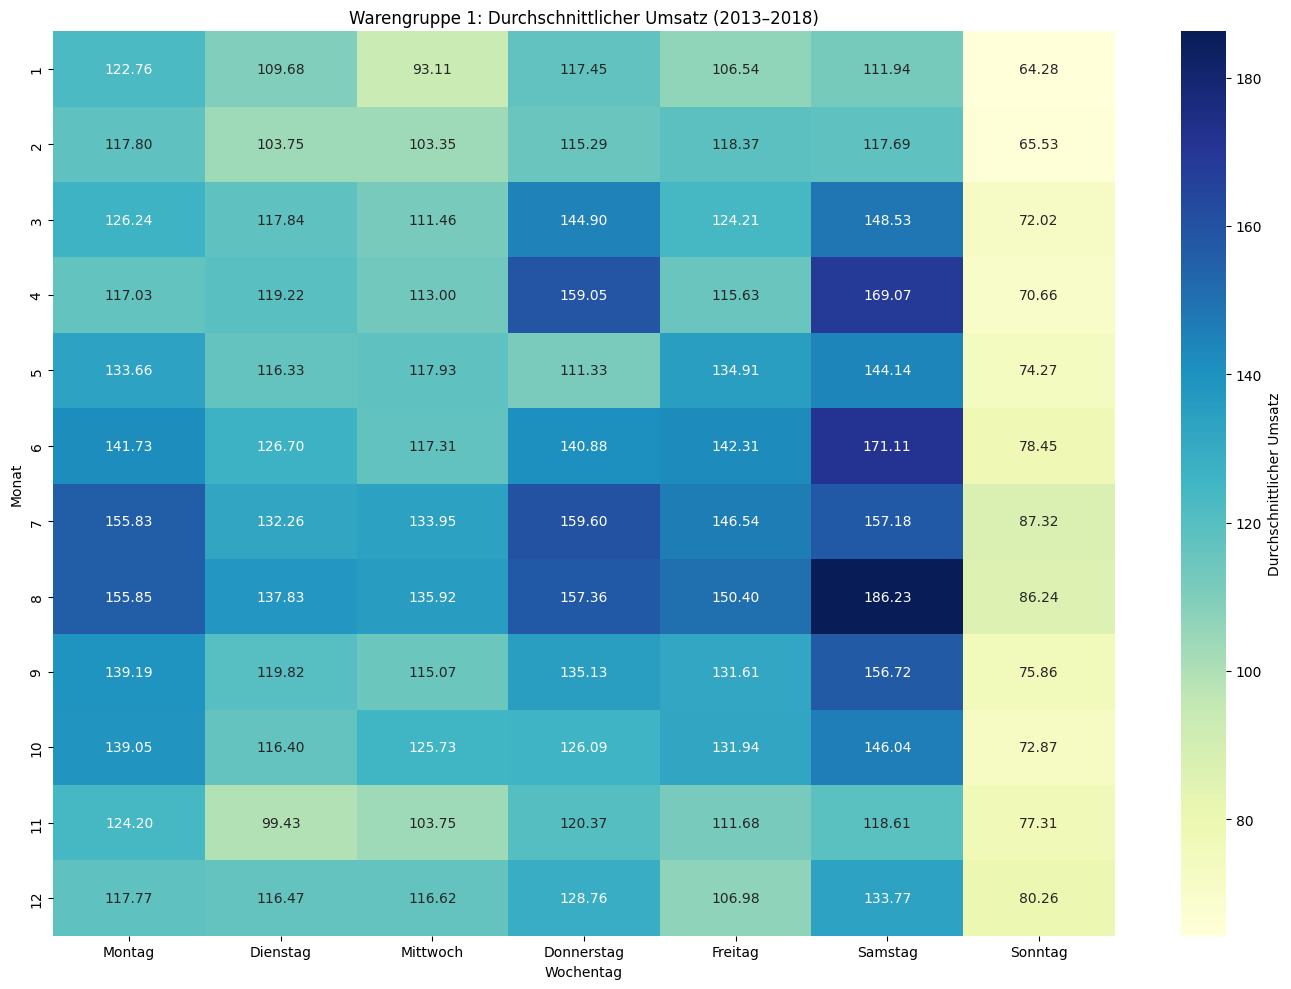

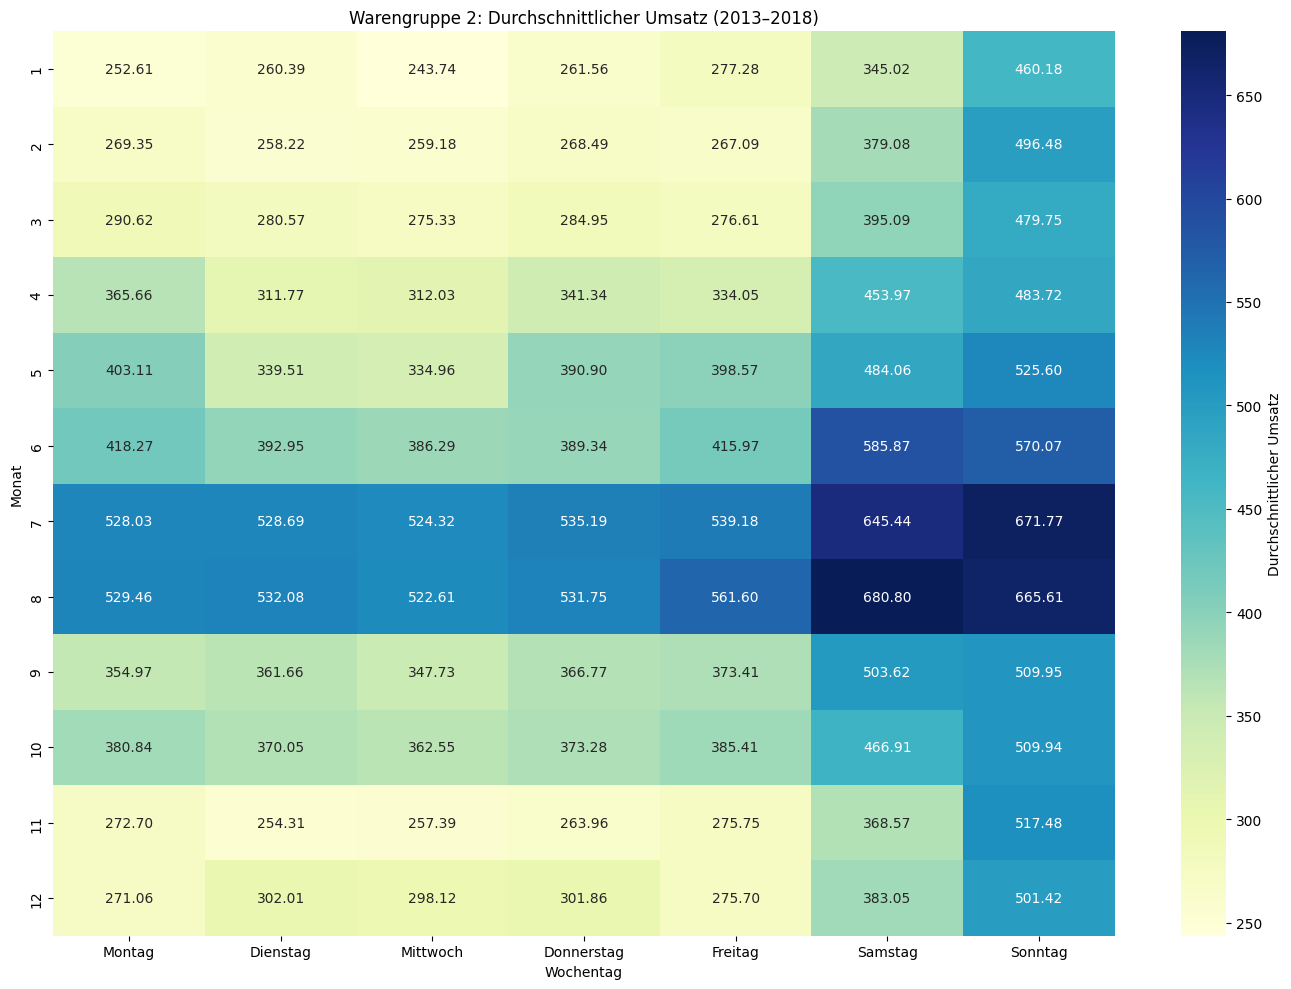

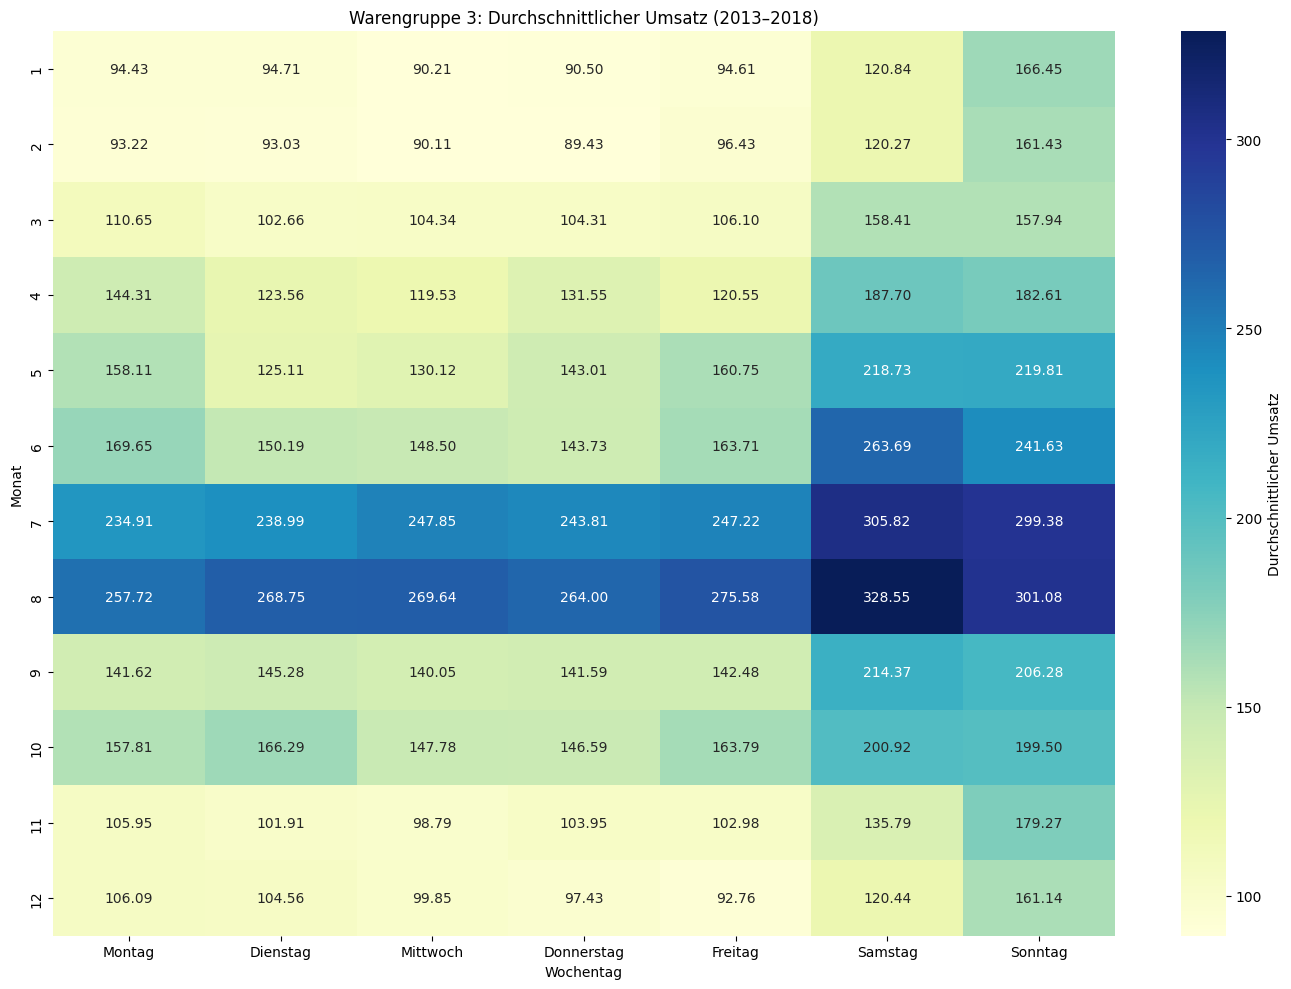

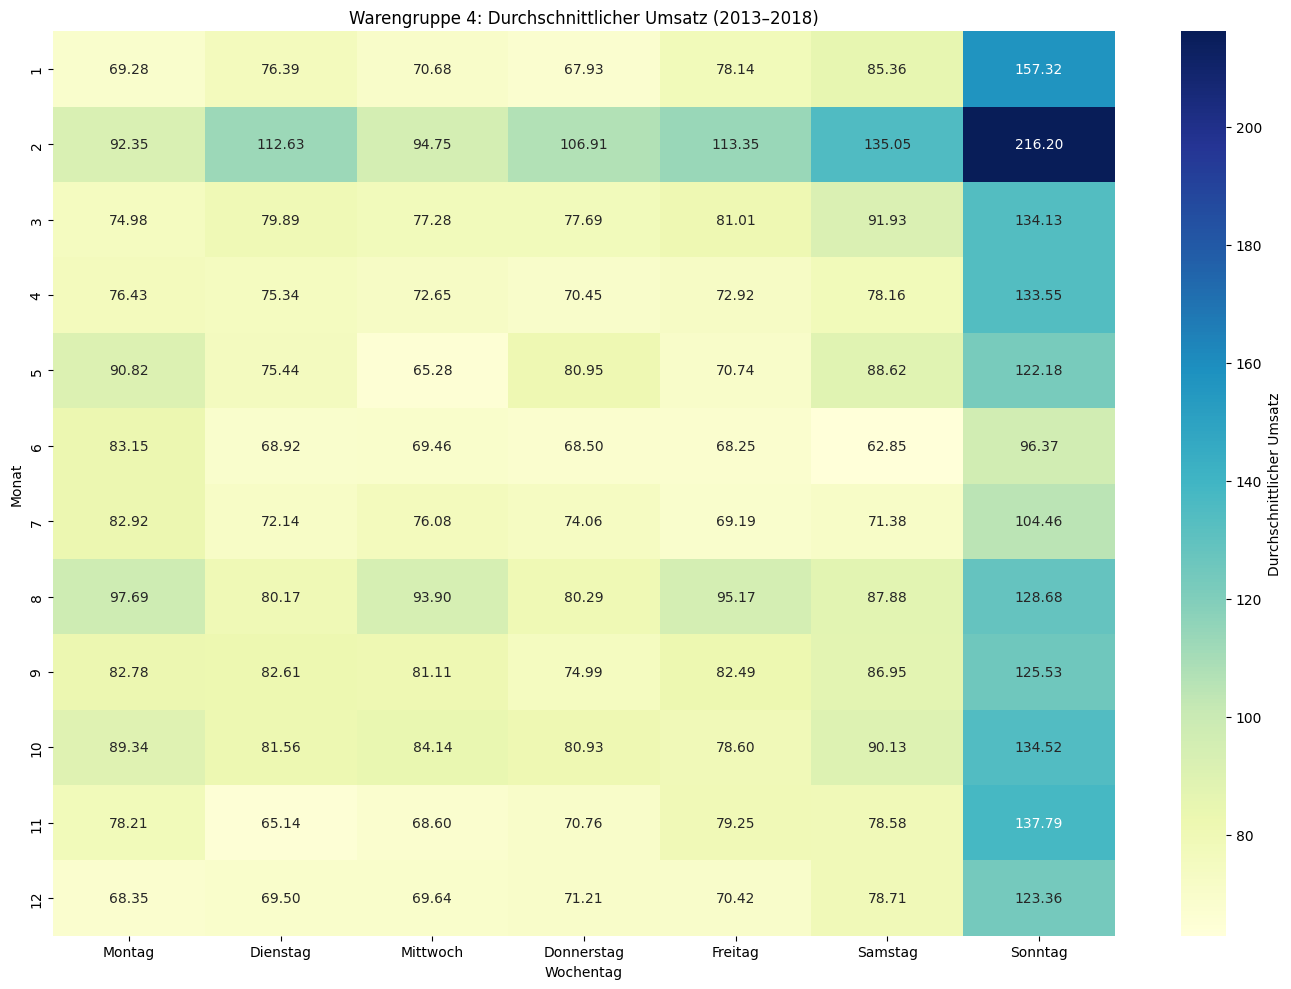

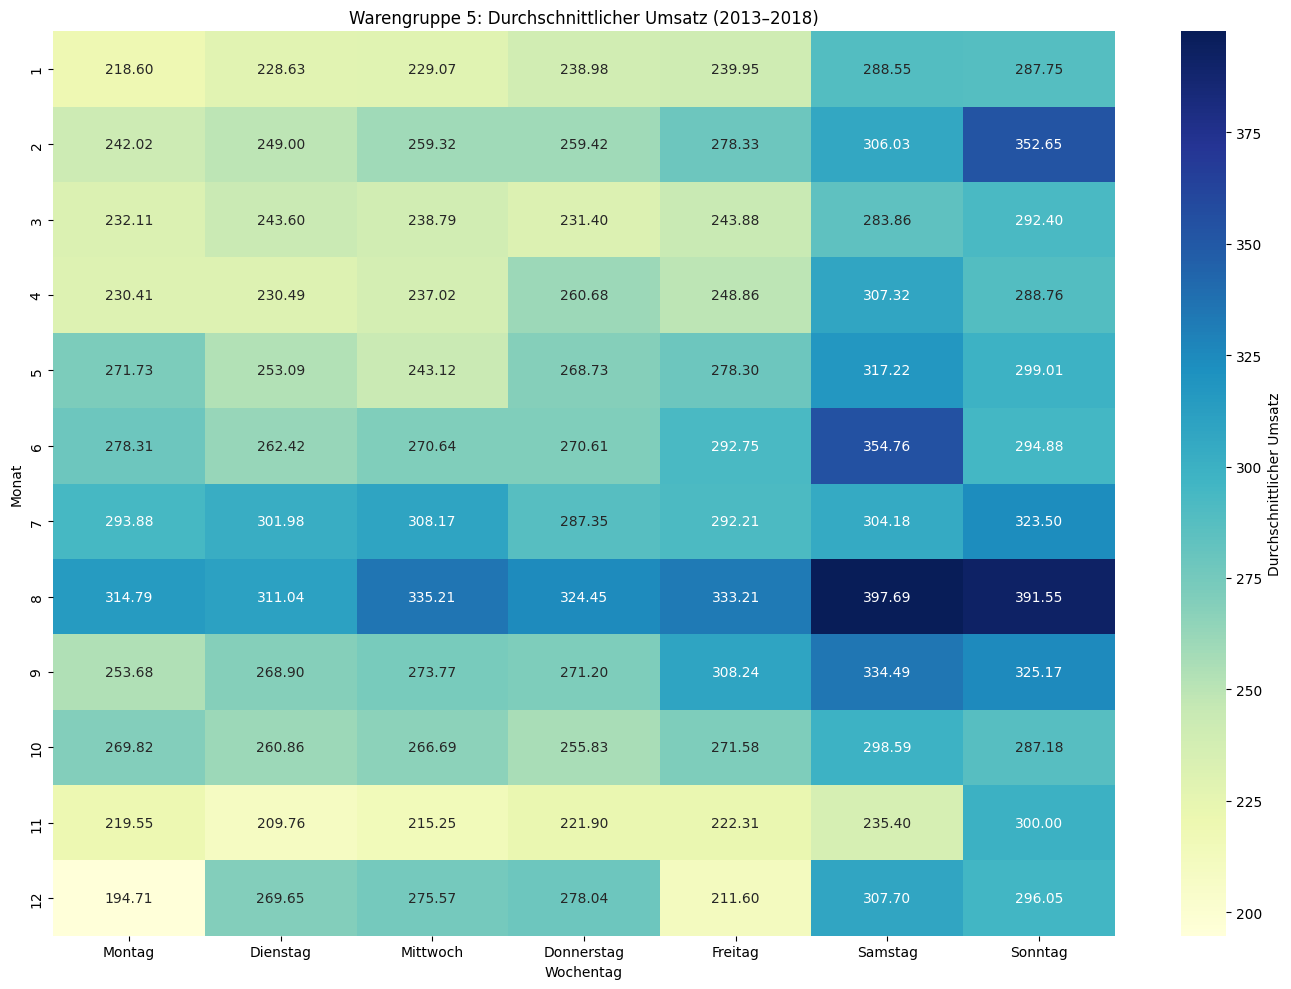

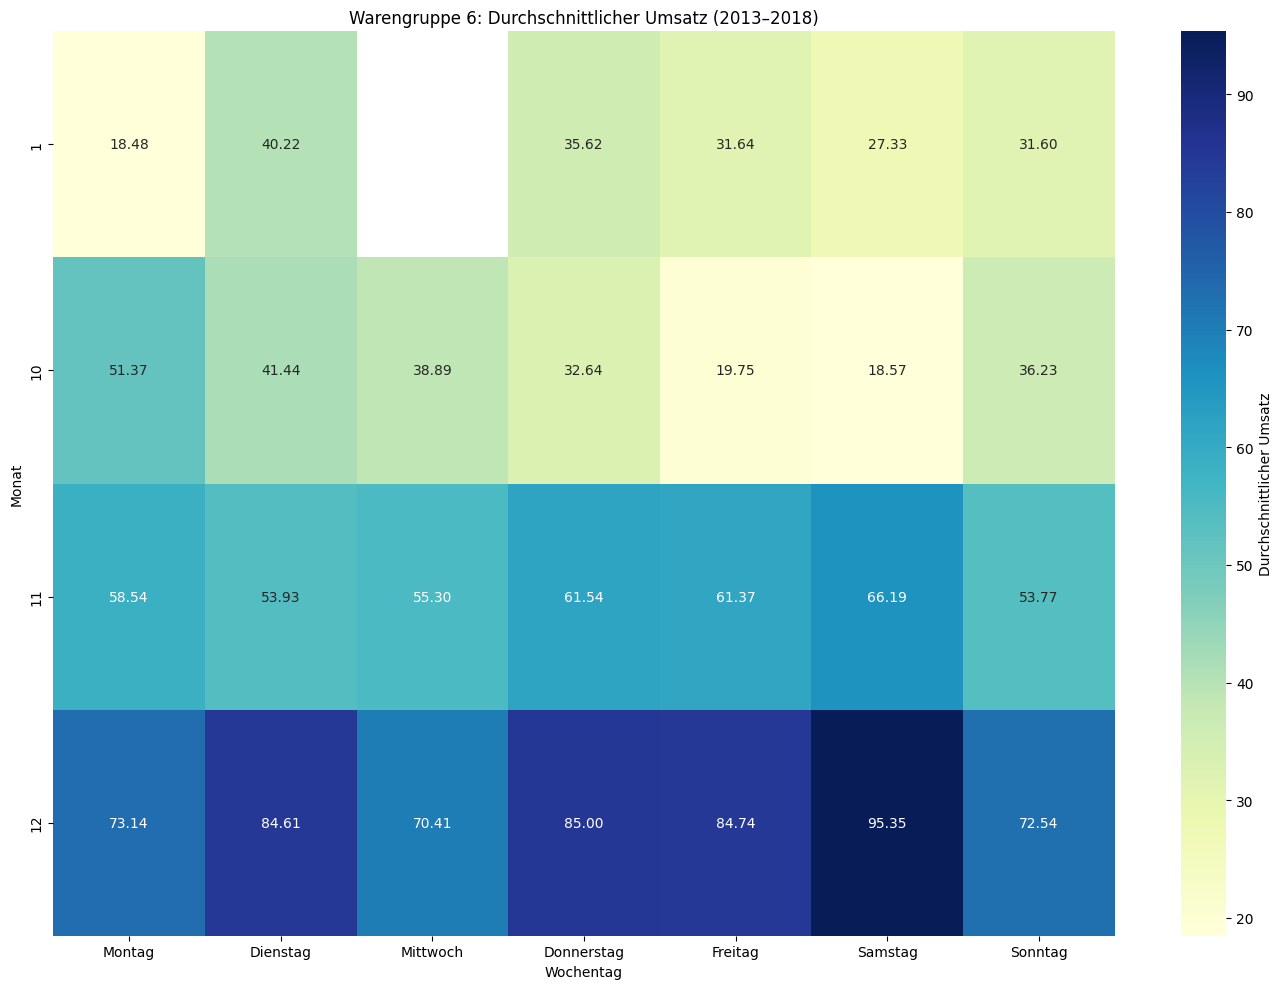

In [7]:
# Umsatz je Warengruppe übers Jahr verteilt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei laden
df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/0_DataPreparation/df_merged_umsatz_kiwo_wetter_wochentage.csv')


# Sicherstellen, dass Datum als Datetime erkannt wird
df['Datum'] = pd.to_datetime(df['Datum'])

# Spalte 'Jahr', 'Monat' und 'Wochentag_Num' aus 'Datum' ableiten
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month
df['Wochentag_Num'] = df['Datum'].dt.dayofweek  # Wochentag als Zahl (0=Montag, 6=Sonntag)

# Überprüfen, ob 'Wochentag_Num' erstellt wurde
print(df.head())

# Umsatz nach Jahr, Monat, Wochentag und Warengruppe aggregieren
umsatz_aggregiert = (
    df.groupby(['Jahr', 'Monat', 'Wochentag_Num', 'Warengruppe'])['Umsatz']
    .mean()
    .reset_index()
)

# Ausgabe: Aggregierte Daten
print(umsatz_aggregiert.head())

# Visualisierung: Heatmap für jeden Monat und Wochentag
wochentag_namen = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']

# Für jede Warengruppe eine Heatmap erstellen
for warengruppe in df['Warengruppe'].unique():
    subset = umsatz_aggregiert[umsatz_aggregiert['Warengruppe'] == warengruppe]
    pivot_table = subset.pivot_table(
        index='Monat', 
        columns='Wochentag_Num', 
        values='Umsatz', 
        aggfunc='mean'
    )
    pivot_table.columns = wochentag_namen  # Spaltennamen für die Wochentage festlegen

    # Heatmap erstellen
    plt.figure(figsize=(14, 10))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        cbar_kws={'label': 'Durchschnittlicher Umsatz'},
    )
    plt.title(f"Warengruppe {warengruppe}: Durchschnittlicher Umsatz (2013–2018)")
    plt.xlabel("Wochentag")
    plt.ylabel("Monat")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_48273/1254974475.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


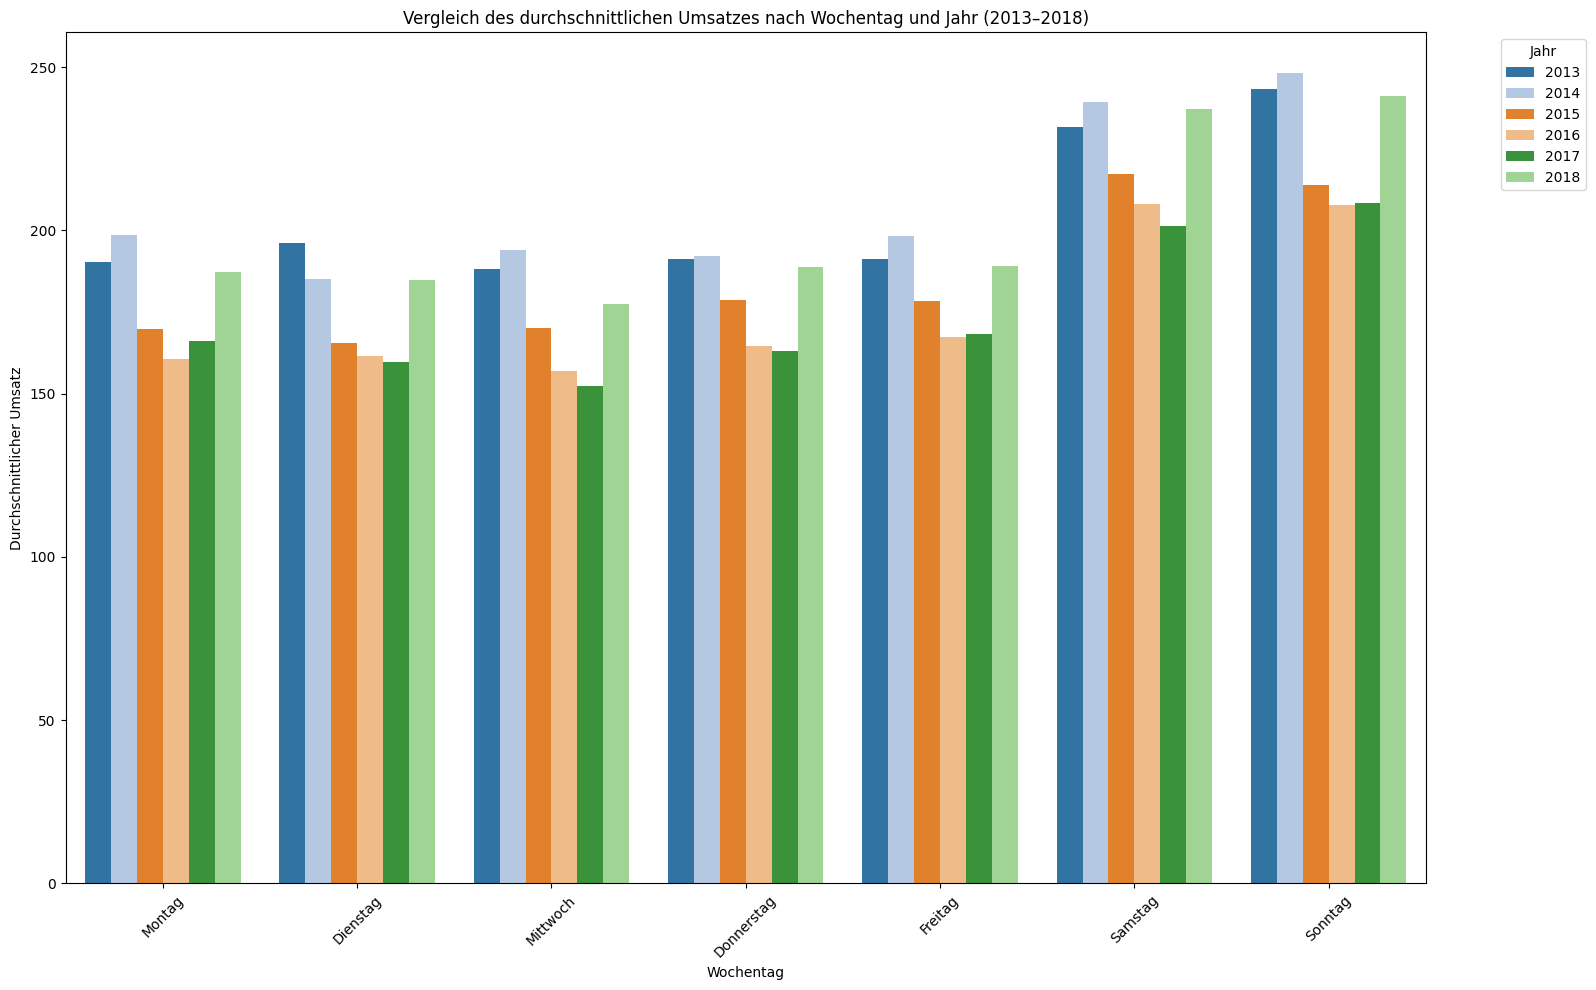

In [10]:
# Vergleich des durchschnittlichen Umsatzes nach Wochentag und Jahr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei laden
df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/0_DataPreparation/df_merged_umsatz_kiwo_wetter_wochentage.csv')

# Sicherstellen, dass Datum als Datetime erkannt wird
df['Datum'] = pd.to_datetime(df['Datum'])

# Spalte 'Jahr', 'Monat' und 'Wochentag_Num' aus 'Datum' ableiten
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month
df['Wochentag_Num'] = df['Datum'].dt.dayofweek  # Wochentag als Zahl (0=Montag, 6=Sonntag)

# Umsatz nach Jahr, Wochentag und Warengruppe aggregieren
umsatz_aggregiert = (
    df.groupby(['Jahr', 'Wochentag_Num', 'Warengruppe'])['Umsatz']
    .mean()
    .reset_index()
)

# Wochentag-Namen für bessere Lesbarkeit
wochentag_namen = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
umsatz_aggregiert['Wochentag'] = umsatz_aggregiert['Wochentag_Num'].apply(lambda x: wochentag_namen[x])

# Visualisierung: Gestaffeltes Balkendiagramm für jede Warengruppe
plt.figure(figsize=(16, 10))
sns.barplot(
    data=umsatz_aggregiert,
    x='Wochentag',
    y='Umsatz',
    hue='Jahr',
    ci=None,  # Kein Konfidenzintervall
    palette='tab20'
)

plt.title('Vergleich des durchschnittlichen Umsatzes nach Wochentag und Jahr (2013–2018)')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.legend(title='Jahr', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


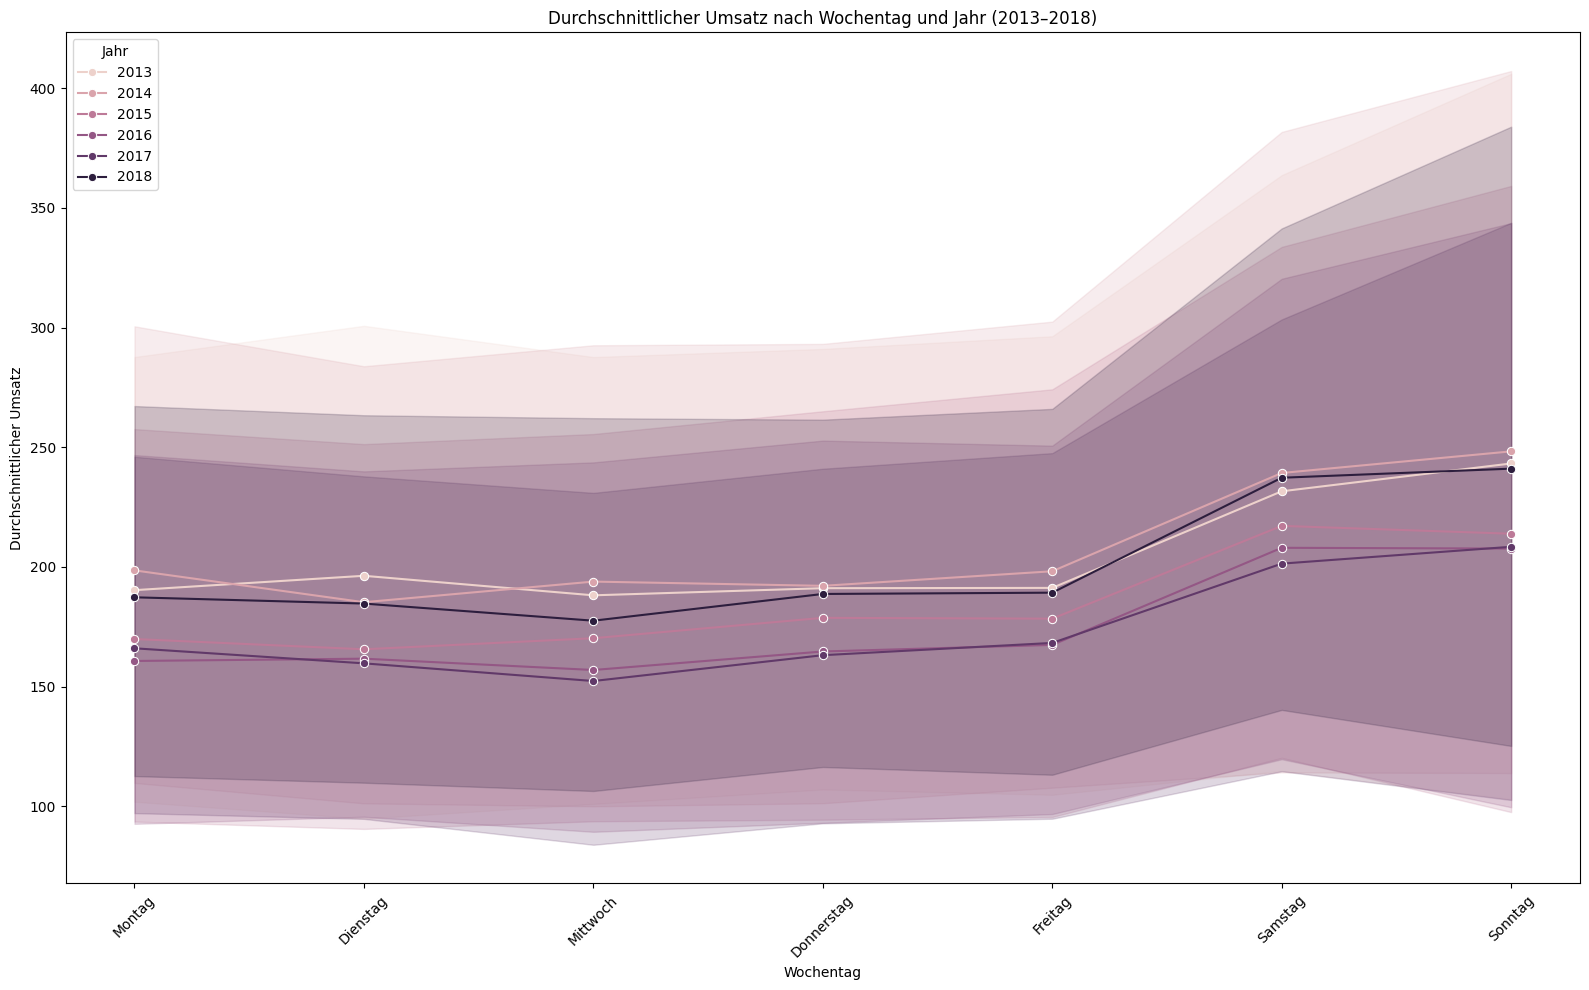

In [11]:
# Lineplot für Umsatz nach Wochentag und Jahr
plt.figure(figsize=(16, 10))
sns.lineplot(
    data=umsatz_aggregiert,
    x='Wochentag',
    y='Umsatz',
    hue='Jahr',
    marker='o'
)

plt.title('Durchschnittlicher Umsatz nach Wochentag und Jahr (2013–2018)')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.legend(title='Jahr')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Kieler Woche - fehlende Werte mit 0 ersetzen
import pandas as pd

# CSV-Datei laden
df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/0_DataPreparation/df_merged_umsatz_kiwo_wetter.csv')

# Ersetze NaN-Werte durch 0 in der 'KielerWoche'-Spalte
df['KielerWoche'] = df['KielerWoche'].fillna(0)

# Ersetze alle Werte, die 1.0 sind, durch 1, und alle anderen durch 0
df['KielerWoche'] = df['KielerWoche'].apply(lambda x: 1 if x == 1.0 else 0)

# Speichern des geänderten DataFrames als neue CSV-Datei
df.to_csv('df_merged_umsatz_kiwo01_wetter_wochentage.csv', index=False)

# Überprüfen, ob die Änderungen vorgenommen wurden
print(df['KielerWoche'].head())


0    0
1    0
2    0
3    0
4    0
Name: KielerWoche, dtype: int64
